# Recycle systems

Recycle systems in BioSTEAM are solved through accelerated fixed-point iteration (just like in Aspen Plus and SuperPro). In the following example, we will look at a common configuration for distillation with heat integration. We will create and analyse a beer column with heat integration for the separation of ethanol from fermentation broth in 2 steps:

1. Create and solve the network of unit operations. 

2. Visualize the recycle system.

**Instructions:** Replace all `None`s with the correct values.

**Step 1: Build the system**

In [1]:
import biosteam as bst
bst.nbtutorial()
bst.settings.set_thermo(['Water', 'Ethanol'])
with bst.System() as sys:
    feed = bst.Stream(
        'feed',
        Ethanol=12,
        Water=88,
        total_flow=1.5e5,
        units='kg/hr',
    )
    pump = bst.Pump(ins=None, P=6 * 101325)
    recycle = bst.Stream('recycle')
    heat_exchanger = bst.HXprocess(
        ins=(None, None), 
        outs=('hot_feed', 'cooled_bottoms_product'),
    )
    beer_column = bst.BinaryDistillation(# ShortcutColumn for 3+ components
        ins=None,
        outs=('distillate', 'bottoms_product'), 
        LHK=('Ethanol', 'Water'), # Light and heavy key
        P=2.1 * 101325, # Operating pressure [Pa]
        y_top=0.35, # Distillate light-key fraction
        x_bot=1e-5, # Bottoms heavy-key fraction
        k=1.1, # Actual reflux over minimum reflux ratio
    )
    pump = bst.Pump(
        ins=None, 
        outs=None, # Outlet goes to heat exchanger
        P=4 * 101325
    )
sys.simulate()
sys.show()

System: SYS1
Highest convergence error among components in recycle
stream P2-0 after 2 loops:
- flow rate   0.00e+00 kmol/hr (0%)
- temperature 0.00e+00 K (0%)
ins...
[0] feed
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow (kmol/hr): Water    7.33e+03
                    Ethanol  391
outs...
[0] distillate
    phase: 'g', T: 383.54 K, P: 212782 Pa
    flow (kmol/hr): Water    726
                    Ethanol  391
[1] cooled_bottoms_product
    phase: 'l', T: 303.15 K, P: 405300 Pa
    flow (kmol/hr): Water    6.6e+03
                    Ethanol  0.066


**Step 2: Visualize the system**

Pass `number=True` to label the simulation order in the diagram:

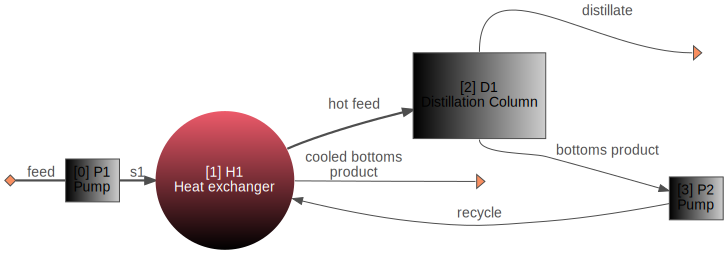

In [2]:
sys.diagram(number=None, format='svg')

This topography shows a flat system without explicit recycle loops. To view the nested system, pass `kind='cluster'`:

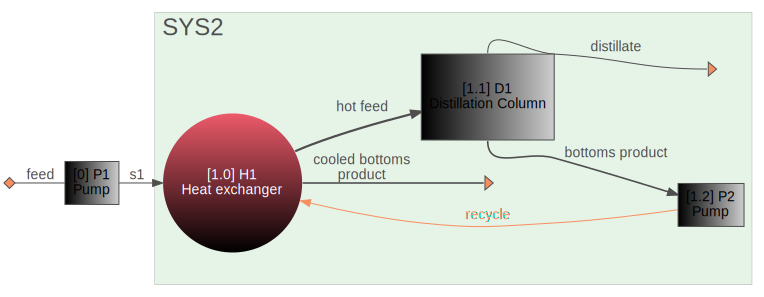

In [3]:
sys.diagram(number=None, kind=None, format='svg')

Some unit operations are composed of multiple unit operations that are solved internally with specialized algorithms. To view the first layer of these auxiliary units, pass `auxiliaries=1`:

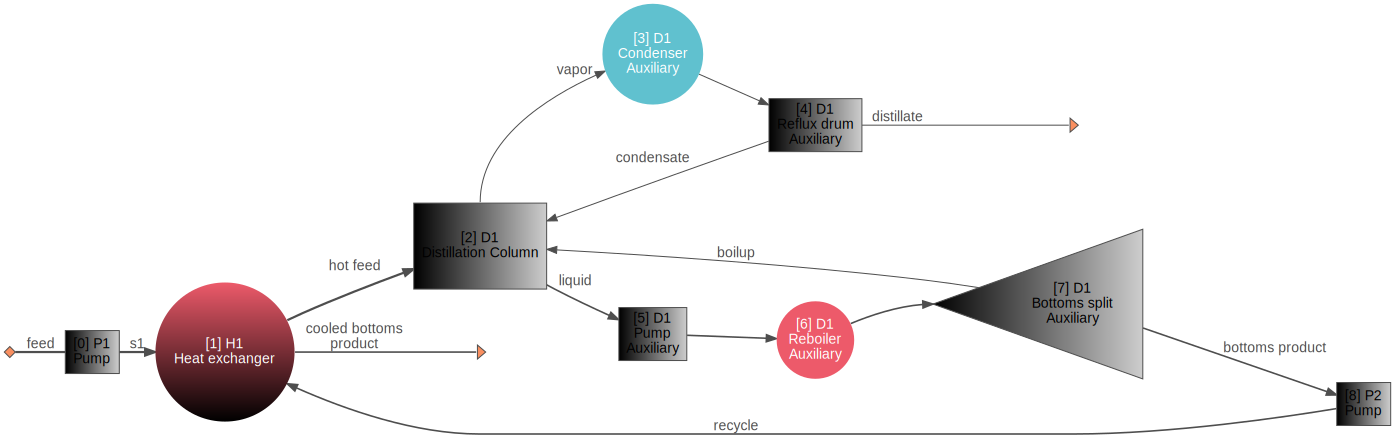

In [4]:
sys.diagram(number=None, auxiliaries=None, format='svg')